# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from collections import Counter

# suppress warnings
warnings.filterwarnings("ignore")

## 1.1 Reading Data

In [7]:
project_data = pd.read_csv('../resources/train_data.csv')
resource_data = pd.read_csv('../resources/resources.csv')
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0


In [8]:
print("Number of data points in project data frame", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in project data frame (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [9]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

In [10]:
print("Number of data points in our resource data frame", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in our resource data frame (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [11]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [12]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,213.03,8
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Literacy & Language,Literacy,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1,329.00,1
3,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,481.04,9
4,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,17.74,14


In [13]:
print("Number of data points in project data after merging price and quantity", project_data.shape)
print(project_data.columns.values)

Number of data points in project data after merging price and quantity (109248, 19)
['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state' 'Date'
 'project_grade_category' 'project_subject_categories'
 'project_subject_subcategories' 'project_title' 'project_essay_1'
 'project_essay_2' 'project_essay_3' 'project_essay_4'
 'project_resource_summary' 'teacher_number_of_previously_posted_projects'
 'project_is_approved' 'price' 'quantity']


In [14]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109248 entries, 0 to 109247
Data columns (total 19 columns):
Unnamed: 0                                      109248 non-null int64
id                                              109248 non-null object
teacher_id                                      109248 non-null object
teacher_prefix                                  109245 non-null object
school_state                                    109248 non-null object
Date                                            109248 non-null datetime64[ns]
project_grade_category                          109248 non-null object
project_subject_categories                      109248 non-null object
project_subject_subcategories                   109248 non-null object
project_title                                   109248 non-null object
project_essay_1                                 109248 non-null object
project_essay_2                                 109248 non-null object
project_essay_3               

## 1.1.1 Handling Null Values

In [15]:
# from above matric I know that teacher_prefix has 3 null values we need to handle that
# also most of values of project_essay_3 and project_essay_4 are null

project_data["teacher_prefix"].fillna( value = 'Mrs.', inplace = True) 

In [16]:
## 1.5 Combining 4 essay columns to get a single Essay column

project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)
# project_data['essay'].head()

In [17]:
# it can be clearly seen that we have handled all null values in our data frame.
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109248 entries, 0 to 109247
Data columns (total 16 columns):
Unnamed: 0                                      109248 non-null int64
id                                              109248 non-null object
teacher_id                                      109248 non-null object
teacher_prefix                                  109248 non-null object
school_state                                    109248 non-null object
Date                                            109248 non-null datetime64[ns]
project_grade_category                          109248 non-null object
project_subject_categories                      109248 non-null object
project_subject_subcategories                   109248 non-null object
project_title                                   109248 non-null object
project_resource_summary                        109248 non-null object
teacher_number_of_previously_posted_projects    109248 non-null int64
project_is_approved            

In [18]:
df_approved = project_data[project_data.project_is_approved==1].tail(44000)
df_rejected = project_data[project_data.project_is_approved==0]

final_df = pd.concat([df_approved, df_rejected])
print(final_df.shape)

(60542, 16)


## 1.2 preprocessing of `project_subject_categories`

In [19]:
def preprocess_text(column_name):
    catogories = list(final_df[column_name].values)
    # remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
    # https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
    # https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
    # https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
    cat_list = []
    for i in catogories:
        temp = ""
        # consider we have text like this "Math & Science, Warmth, Care & Hunger"
        for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
            if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_') # we are replacing the & value into 
        cat_list.append(temp.strip())
    return cat_list    
        

In [20]:
# preprocessing of `project_subject_categories`
final_df['clean_categories'] = preprocess_text('project_subject_categories')
final_df.drop(['project_subject_categories'], axis=1, inplace=True)

## 1.3 preprocessing of `project_subject_subcategories`

In [21]:
# preprocessing of `project_subject_subcategories`
final_df['clean_subcategories'] = preprocess_text('project_subject_subcategories')
final_df.drop(['project_subject_subcategories'], axis=1, inplace=True)

## 1.4 Adding New Feature  `No. of words in project_title`

In [22]:
final_df['title_word_count'] = final_df['project_title'].apply(lambda x: len(x.split()))

In [23]:
final_df.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,essay,clean_categories,clean_subcategories,title_word_count
57914,20585,p162378,d7f9112bc7cb9f651090a0afc0808f1d,Ms.,MA,2016-10-10 12:30:53,Grades PreK-2,Providing Access to Technology to First Graders,My students need Kindle Fire tablets to provid...,0,1,99.99,4,I spend each day with a group of phenomenal fi...,Literacy_Language,Literacy,7
57915,67525,p074880,a8731a23e04ca6fa1d528e5f8914d6a8,Mrs.,FL,2016-10-10 12:32:36,Grades 9-12,This Little Piggy Goes to Bio Class,My students need 24 pig anatomy kits and a box...,1,1,45.85,25,My students are an amazing group of individual...,Math_Science,Health_LifeScience,7


## 1.5 Preprocessing project grade category

In [24]:
# replacing space with _.
final_df['project_grade_category'] = final_df['project_grade_category'].apply(lambda x: x.replace(' ', '_').replace('-', '_'))
print('Post Preprocessing: ')
final_df['project_grade_category'].value_counts()

Post Preprocessing: 


Grades_PreK_2    24307
Grades_3_5       20295
Grades_6_8        9596
Grades_9_12       6344
Name: project_grade_category, dtype: int64

## 1.6 Preprocessing teacher_prefix

In [25]:
# replacing '.' with ''
final_df['teacher_prefix'] = final_df['teacher_prefix'].apply(lambda x: x.replace('.', ''))
print('Post Preprocessing: ')
final_df['teacher_prefix'].value_counts()

Post Preprocessing: 


Mrs        31061
Ms         21895
Mr          6136
Teacher     1440
Dr            10
Name: teacher_prefix, dtype: int64

## 1.6 Adding New Feature  `No. of words in Essay`

In [26]:
final_df['essay_word_count'] = final_df['essay'].apply(lambda x: len(x.split()))

In [27]:
final_df.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,essay,clean_categories,clean_subcategories,title_word_count,essay_word_count
57914,20585,p162378,d7f9112bc7cb9f651090a0afc0808f1d,Ms,MA,2016-10-10 12:30:53,Grades_PreK_2,Providing Access to Technology to First Graders,My students need Kindle Fire tablets to provid...,0,1,99.99,4,I spend each day with a group of phenomenal fi...,Literacy_Language,Literacy,7,284
57915,67525,p074880,a8731a23e04ca6fa1d528e5f8914d6a8,Mrs,FL,2016-10-10 12:32:36,Grades_9_12,This Little Piggy Goes to Bio Class,My students need 24 pig anatomy kits and a box...,1,1,45.85,25,My students are an amazing group of individual...,Math_Science,Health_LifeScience,7,222


## 1.7 Preprocessing of `essay`

In [28]:
# https://stackoverflow.com/a/47091490/4084039
import re
from tqdm import tqdm

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


def preprocess_sentences(column_name):
    preprocessed = []
    # tqdm is for printing the status bar
    for sentance in tqdm(final_df[column_name].values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed.append(sent.lower().strip())
    return preprocessed  

In [29]:
final_df['clean_essay'] = preprocess_sentences('essay')
final_df.drop(['essay'], axis=1, inplace=True)
final_df.head(2)

100%|██████████| 60542/60542 [00:32<00:00, 1874.09it/s]


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,title_word_count,essay_word_count,clean_essay
57914,20585,p162378,d7f9112bc7cb9f651090a0afc0808f1d,Ms,MA,2016-10-10 12:30:53,Grades_PreK_2,Providing Access to Technology to First Graders,My students need Kindle Fire tablets to provid...,0,1,99.99,4,Literacy_Language,Literacy,7,284,spend day group phenomenal first graders toget...
57915,67525,p074880,a8731a23e04ca6fa1d528e5f8914d6a8,Mrs,FL,2016-10-10 12:32:36,Grades_9_12,This Little Piggy Goes to Bio Class,My students need 24 pig anatomy kits and a box...,1,1,45.85,25,Math_Science,Health_LifeScience,7,222,students amazing group individuals overcoming ...


## 1.8 Preprocessing of `project_title`

In [30]:
# preprocessing of `project_title`
final_df['clean_title'] = preprocess_sentences('project_title')
final_df.drop(['project_title'], axis=1, inplace=True)
final_df.head(2)

100%|██████████| 60542/60542 [00:01<00:00, 38236.36it/s]


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,title_word_count,essay_word_count,clean_essay,clean_title
57914,20585,p162378,d7f9112bc7cb9f651090a0afc0808f1d,Ms,MA,2016-10-10 12:30:53,Grades_PreK_2,My students need Kindle Fire tablets to provid...,0,1,99.99,4,Literacy_Language,Literacy,7,284,spend day group phenomenal first graders toget...,providing access technology first graders
57915,67525,p074880,a8731a23e04ca6fa1d528e5f8914d6a8,Mrs,FL,2016-10-10 12:32:36,Grades_9_12,My students need 24 pig anatomy kits and a box...,1,1,45.85,25,Math_Science,Health_LifeScience,7,222,students amazing group individuals overcoming ...,little piggy goes bio class


<h2>2.1 Splitting data into Train, Cross validation and Test: Stratified Sampling</h2>

In [31]:
# I have divided the data into train, cv and test set with ratio 60:20:20 .

X_1, X_test, y_1, y_test = train_test_split(final_df, final_df['project_is_approved'], test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

In [32]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [33]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'clean_categories', 'clean_subcategories', 'title_word_count',
       'essay_word_count', 'clean_essay', 'clean_title'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - title_word_count: No. of words in project_title
       _ essay_word_count: No. of words in essay.
       
       
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - clean_title : text data
       - clean_essay : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h2>2.2.1 Vectorizing numerical features</h2>

* I am using one hot encoding technique to encode our categorical features.


<h2> A) Price</h2>

In [34]:
# encoding price
from sklearn.preprocessing import StandardScaler

# standardizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: # array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.


standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['price'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

price_train = standardizer.transform(X_train['price'].values.reshape(-1, 1))
price_cv = standardizer.transform(X_cv['price'].values.reshape(-1, 1))
price_test = standardizer.transform(X_test['price'].values.reshape(-1, 1))


print('Post Standardization')
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)
print('*'*100)

Mean : 298.5071535126206, Standard deviation : 376.42382111593906

Post Standardization
(38746, 1) (38746,)
(9687, 1) (9687,)
(12109, 1) (12109,)
****************************************************************************************************


<h2> B) Quantity</h2>

In [35]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['quantity'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

quantity_train = standardizer.transform(X_train['quantity'].values.reshape(-1, 1))
quantity_cv = standardizer.transform(X_cv['quantity'].values.reshape(-1, 1))
quantity_test = standardizer.transform(X_test['quantity'].values.reshape(-1, 1))


print('Post Standardization')
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)
print('*'*100)

Mean : 16.54139782171063, Standard deviation : 25.628978294366323

Post Standardization
(38746, 1) (38746,)
(9687, 1) (9687,)
(12109, 1) (12109,)
****************************************************************************************************


<h2> C) Number of projects previously posted by Teacher</h2>

In [36]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

prev_teacher_proj_train = standardizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_teacher_proj_cv = standardizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_teacher_proj_test = standardizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


print('Post Standardization')
print(prev_teacher_proj_train.shape, y_train.shape)
print(prev_teacher_proj_cv.shape, y_cv.shape)
print(prev_teacher_proj_test.shape, y_test.shape)
print('*'*100)

Mean : 12.029370773757291, Standard deviation : 29.518216519463813

Post Standardization
(38746, 1) (38746,)
(9687, 1) (9687,)
(12109, 1) (12109,)
****************************************************************************************************


<h2> D) Title word Count</h2>

In [37]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['title_word_count'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

title_word_count_train = standardizer.transform(X_train['title_word_count'].values.reshape(-1, 1))
title_word_count_cv = standardizer.transform(X_cv['title_word_count'].values.reshape(-1, 1))
title_word_count_test = standardizer.transform(X_test['title_word_count'].values.reshape(-1, 1))


print('Post Standardization')
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print('*'*100)

Mean : 5.087209002219584, Standard deviation : 2.0904440065863996

Post Standardization
(38746, 1) (38746,)
(9687, 1) (9687,)
(12109, 1) (12109,)
****************************************************************************************************


<h2> E) Essay word Count</h2>

In [38]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['essay_word_count'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

essay_word_count_train = standardizer.transform(X_train['essay_word_count'].values.reshape(-1, 1))
essay_word_count_cv = standardizer.transform(X_cv['essay_word_count'].values.reshape(-1, 1))
essay_word_count_test = standardizer.transform(X_test['essay_word_count'].values.reshape(-1, 1))


print('Post Standardization')
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)
print('*'*100)

Mean : 251.49785784339028, Standard deviation : 62.24243896188054

Post Standardization
(38746, 1) (38746,)
(9687, 1) (9687,)
(12109, 1) (12109,)
****************************************************************************************************


<h2>2.2.2 Encoding categorical features</h2>


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# we use count vectorizer to convert the values into one 

def get_categorical_vectorizer_for_training(df,column_name):
    my_counter = Counter()
    for word in df[column_name].values:
        my_counter.update(word.split())
    cat_dict = dict(my_counter)
    sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
    vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
    return vectorizer.fit(df[column_name].values)

<h2> A) Encoding clean_categories</h2>

In [40]:
vectorizer = get_categorical_vectorizer_for_training(X_train, 'clean_categories')

categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values) 
categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values) 
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values) 

print('Post Encoding: ')
print(vectorizer.get_feature_names())

print('*'*100)
print('Encoded training sample: ')
print(categories_one_hot_train[:5])   
print('*'*100)

print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

print('*'*100)

Post Encoding: 
['Warmth', 'Care_Hunger', 'History_Civics', 'Health_Sports', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Math_Science', 'Literacy_Language']
****************************************************************************************************
Encoded training sample: 
  (0, 6)	1
  (1, 7)	1
  (2, 8)	1
  (3, 7)	1
  (4, 7)	1
  (4, 8)	1
****************************************************************************************************
Shape of matrix after one hot encodig  (38746, 9)
Shape of matrix after one hot encodig  (9687, 9)
Shape of matrix after one hot encodig  (12109, 9)
****************************************************************************************************


<h2> B) Encoding clean_subcategories</h2>

In [41]:
vectorizer = get_categorical_vectorizer_for_training(X_train, 'clean_subcategories')

sub_categories_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values) 
sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values) 
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values) 

print('Post Encoding: ')
print(vectorizer.get_feature_names())

print('*'*100)
print('Encoded training sample: ')
print(sub_categories_one_hot_train[5:10])   
print('*'*100)

print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_test.shape)

print('*'*100)

Post Encoding: 
['Economics', 'CommunityService', 'NutritionEducation', 'Civics_Government', 'FinancialLiteracy', 'ForeignLanguages', 'Extracurricular', 'ParentInvolvement', 'SocialSciences', 'CharacterEducation', 'PerformingArts', 'TeamSports', 'Other', 'Warmth', 'Care_Hunger', 'Gym_Fitness', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Health_Wellness', 'EnvironmentalScience', 'VisualArts', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
****************************************************************************************************
Encoded training sample: 
  (0, 25)	1
  (0, 29)	1
  (1, 27)	1
  (2, 28)	1
  (2, 29)	1
  (3, 27)	1
  (3, 29)	1
  (4, 29)	1
****************************************************************************************************
Shape of matrix after one hot encodig  (38746, 30)
Shape of matrix after one hot encodig  (9687, 30)
Shape of matrix after one hot encodig 

<h2> C) Encoding school_state</h2>

In [42]:
vectorizer = get_categorical_vectorizer_for_training(X_train, 'school_state')

school_state_one_hot_train = vectorizer.transform(X_train['school_state'].values) 
school_state_one_hot_cv = vectorizer.transform(X_cv['school_state'].values) 
school_state_one_hot_test = vectorizer.transform(X_test['school_state'].values) 

print('Post Encoding: ')
print(vectorizer.get_feature_names())

print('*'*100)
print('Encoded training sample: ')
print(school_state_one_hot_train[:5])   
print('*'*100)

print("Shape of matrix after one hot encodig ",school_state_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",school_state_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",school_state_one_hot_test.shape)

print('*'*100)

Post Encoding: 
['VT', 'WY', 'ND', 'MT', 'NE', 'DE', 'SD', 'RI', 'AK', 'NH', 'WV', 'ME', 'DC', 'HI', 'IA', 'NM', 'KS', 'ID', 'AR', 'OR', 'CO', 'MN', 'KY', 'MS', 'NV', 'MD', 'UT', 'TN', 'CT', 'WI', 'AL', 'VA', 'LA', 'OK', 'AZ', 'WA', 'MO', 'OH', 'MA', 'NJ', 'IN', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
****************************************************************************************************
Encoded training sample: 
  (0, 36)	1
  (1, 44)	1
  (2, 50)	1
  (3, 50)	1
  (4, 50)	1
****************************************************************************************************
Shape of matrix after one hot encodig  (38746, 51)
Shape of matrix after one hot encodig  (9687, 51)
Shape of matrix after one hot encodig  (12109, 51)
****************************************************************************************************


<h2> D) Encoding teacher_prefix</h2>


In [43]:
vectorizer = get_categorical_vectorizer_for_training(X_train, 'teacher_prefix')

teacher_prefix_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values) 
teacher_prefix_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values) 
teacher_prefix_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values) 

print('Post Encoding')
print(vectorizer.get_feature_names())

print('*'*100)
print('Encoded training sample: ')
print(teacher_prefix_one_hot_train[:5])   
print('*'*100)

print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)

print('*'*100)

Post Encoding
['Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']
****************************************************************************************************
Encoded training sample: 
  (0, 3)	1
  (1, 4)	1
  (2, 2)	1
  (3, 3)	1
  (4, 1)	1
****************************************************************************************************
Shape of matrix after one hot encodig  (38746, 5)
Shape of matrix after one hot encodig  (9687, 5)
Shape of matrix after one hot encodig  (12109, 5)
****************************************************************************************************


<h2> E) Encoding project_grade_category</h2>


In [44]:
vectorizer = get_categorical_vectorizer_for_training(X_train, 'project_grade_category')

project_grade_category_one_hot_train = vectorizer.transform(X_train['project_grade_category'].values) 
project_grade_category_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'].values) 
project_grade_category_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values) 

print('Post Encoding')
print(vectorizer.get_feature_names())

print('*'*100)
print('Encoded training sample: ')
print(project_grade_category_one_hot_test[:5])   
print('*'*100)

print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_cv.shape)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_test.shape)

print('*'*100)

# final_df.head(2)

Post Encoding
['Grades_9_12', 'Grades_6_8', 'Grades_3_5', 'Grades_PreK_2']
****************************************************************************************************
Encoded training sample: 
  (0, 1)	1
  (1, 0)	1
  (2, 1)	1
  (3, 3)	1
  (4, 0)	1
****************************************************************************************************
Shape of matrix after one hot encodig  (38746, 4)
Shape of matrix after one hot encodig  (9687, 4)
Shape of matrix after one hot encodig  (12109, 4)
****************************************************************************************************


<h2>2.2.3 Vectorizing Text features</h2>

<h2> A) Bag of Words (BOW)</h2>

<h3> Bag of Words - clean_essay</h3>

In [46]:
# performing bow on essay field

vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['clean_essay'])

essay_bow_train = vectorizer.transform(X_train['clean_essay'])
essay_bow_cv = vectorizer.transform(X_cv['clean_essay'])
essay_bow_test = vectorizer.transform(X_test['clean_essay']) 


print('Post Vectorization')

print("Shape of matrix after bow vectorization of essay on train data ",essay_bow_train.shape)
print("Shape of matrix after bow vectorization of essay on cv data",essay_bow_cv.shape)
print("Shape of matrix after bow vectorization of essay on test data",essay_bow_test.shape)

print('*'*100)


Post Vectorization
Shape of matrix after bow vectorization of essay on train data  (38746, 10968)
Shape of matrix after bow vectorization of essay on cv data (9687, 10968)
Shape of matrix after bow vectorization of essay on test data (12109, 10968)
****************************************************************************************************


<h3> Bag of Words - clean_title</h3>

In [47]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['clean_title'])


title_bow_train = vectorizer.transform(X_train['clean_title'])
title_bow_cv = vectorizer.transform(X_cv['clean_title'])
title_bow_test = vectorizer.transform(X_test['clean_title']) 


print('Post Vectorization: ')

print("Shape of matrix after bow vectorization of title on train data ",title_bow_train.shape)
print("Shape of matrix after bow vectorization of title on cv data",title_bow_cv.shape)
print("Shape of matrix after bow vectorization of title on test data",title_bow_test.shape)

print('*'*100)

Post Vectorization: 
Shape of matrix after bow vectorization of title on train data  (38746, 1718)
Shape of matrix after bow vectorization of title on cv data (9687, 1718)
Shape of matrix after bow vectorization of title on test data (12109, 1718)
****************************************************************************************************


<h2> B) TFIDF Vectorizer</h2>

<h3> TFIDF - clean_essay</h3>

In [48]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['clean_title'])


title_tfidf_train = vectorizer.transform(X_train['clean_title'])
title_tfidf_cv = vectorizer.transform(X_cv['clean_title'])
title_tfidf_test = vectorizer.transform(X_test['clean_title']) 

print('Post Vectorization')

print("Shape of matrix after tfidf vectorization of title on train data ",title_tfidf_train.shape)
print("Shape of matrix after tfidf vectorization of title on cv data",title_tfidf_cv.shape)
print("Shape of matrix after tfidf vectorization of title on test data",title_tfidf_test.shape)
print('*'*100)

Post Vectorization
Shape of matrix after tfidf vectorization of title on train data  (38746, 1718)
Shape of matrix after tfidf vectorization of title on cv data (9687, 1718)
Shape of matrix after tfidf vectorization of title on test data (12109, 1718)
****************************************************************************************************


<h3> TFIDF - clean_title</h3>

In [49]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['clean_essay'])


essay_tfidf_train = vectorizer.transform(X_train['clean_essay'])
essay_tfidf_cv = vectorizer.transform(X_cv['clean_essay'])
essay_tfidf_test = vectorizer.transform(X_test['clean_essay']) 

print('Post Vectorization: ')

print("Shape of matrix after tfidf vectorization of essay on train data ",essay_tfidf_train.shape)
print("Shape of matrix after tfidf vectorization of essay on cv data",essay_tfidf_cv.shape)
print("Shape of matrix after tfidf vectorization of essay on test data",essay_tfidf_test.shape)
print('*'*100)

Post Vectorization: 
Shape of matrix after tfidf vectorization of essay on train data  (38746, 10968)
Shape of matrix after tfidf vectorization of essay on cv data (9687, 10968)
Shape of matrix after tfidf vectorization of essay on test data (12109, 10968)
****************************************************************************************************


<h2> C) Avg W2V</h2>

In [50]:
# https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python

import numpy as np
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

In [52]:
glove_model = loadGloveModel('../resources/glove.42B.300d.txt')

2054it [00:00, 10257.90it/s]

Loading Glove Model


1917495it [02:44, 11645.27it/s]

Done. 1917495  words loaded!


In [62]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

def perform_avg_w2v(list_sent, w2v_model, w2v_words):
    # average Word2Vec
    # compute average word2vec for each review.
    avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in tqdm(list_sent): # for each review/sentence
        sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent.split(): # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        avg_w2v.append(sent_vec)
    avg_w2v = np.array(avg_w2v)
    return avg_w2v

<h3> Avg W2V - clean_essay</h3>

In [63]:
train_essays_words = []
for i in X_train['clean_essay'] :
    train_essays_words.extend(i.split(' '))
    
# Find the total number of words in the Train data of Essays.
print("all the words in the X_train clean_essay", len(train_essays_words))   
 
# Find the unique words in this set of words
train_essays_words = set(train_essays_words)
print("the unique words in the X_train clean_essay", len(train_essays_words))


common_words = set(glove_model.keys()).intersection(train_essays_words)
print("The number of words that are present in both glove vectors and our X_train clean_essay are {} which is nearly {}% "
      .format(len(common_words), np.round((float(len(common_words))/len(train_essays_words)) *100)))

all the words in the X_train clean_essay 5275914
the unique words in the X_train clean_essay 37447
The number of words that are present in both glove vectors and our X_train clean_essay are 34687 which is nearly 93.0% 


In [64]:
corpus_train_essay_words = {}
words_glove = set(glove_model.keys())
for i in train_essays_words: 
    if i in words_glove:
        corpus_train_essay_words[i] = glove_model[i]
print("word2vec length of our X_train clean_essay", len(corpus_train_essay_words))

word2vec length of our X_train clean_essay 34687


In [65]:
# storing variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle
with open('glove_vectors_w2v_clean_essay', 'wb') as f:
    pickle.dump(corpus_train_essay_words, f)

In [66]:
# loading stored vectors from pickle file
with open('glove_vectors_w2v_clean_essay', 'rb') as f:
    model = pickle.load(f) 
    glove_words_essay = set(model.keys())

In [67]:
essay_avg_w2v_train = perform_avg_w2v(X_train['clean_essay'], glove_model, glove_words_essay)
essay_avg_w2v_cv = perform_avg_w2v(X_cv['clean_essay'], glove_model, glove_words_essay)
essay_avg_w2v_test = perform_avg_w2v(X_test['clean_essay'], glove_model, glove_words_essay)

print('Post Vectorization: ')

print("Shape of matrix after avg w2v vectorization of essay on train data ",essay_avg_w2v_train.shape)
print("Shape of matrix after avg w2v vectorization of essay on cv data",essay_avg_w2v_cv.shape)
print("Shape of matrix after avg w2v vectorization of essay on test data",essay_avg_w2v_test.shape)
print('*'*100)


100%|██████████| 12109/12109 [00:03<00:00, 4025.90it/s]

Post Vectorization: 
Shape of matrix after avg w2v vectorization of essay on train data  (38746, 300)
Shape of matrix after avg w2v vectorization of essay on cv data (9687, 300)
Shape of matrix after avg w2v vectorization of essay on test data (12109, 300)
****************************************************************************************************


<h3> Avg W2V - clean_title</h3>

In [68]:
train_title_words = []
for i in X_train['clean_title'] :
    train_title_words.extend(i.split(' '))
    
# Find the total number of words in the Train data of Essays.
print("all the words in the X_train clean_title", len(train_title_words))   
 
# Find the unique words in this set of words
train_title_words = set(train_title_words)
print("the unique words in the X_train clean_title", len(train_title_words))


common_words = set(glove_model.keys()).intersection(train_title_words)
print("The number of words that are present in both glove vectors and our X_train clean_essay are {} which is nearly {}% "
      .format(len(common_words), np.round((float(len(common_words))/len(train_title_words)) *100)))

all the words in the X_train clean_title 142143
the unique words in the X_train clean_title 10451
The number of words that are present in both glove vectors and our X_train clean_essay are 10055 which is nearly 96.0% 


In [69]:
corpus_train_title_words = {}
words_glove = set(glove_model.keys())
for i in train_title_words: 
    if i in words_glove:
        corpus_train_title_words[i] = glove_model[i]
print("word2vec length of our X_train clean_title", len(corpus_train_title_words))

word2vec length of our X_train clean_title 10055


In [70]:
# storing variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle
with open('glove_vectors_w2v_clean_title', 'wb') as f:
    pickle.dump(corpus_train_title_words, f)

In [71]:
# loading stored vectors from pickle file
with open('glove_vectors_w2v_clean_title', 'rb') as f:
    model = pickle.load(f) 
    glove_words_title = set(model.keys())

In [72]:
title_avg_w2v_train = perform_avg_w2v(X_train['clean_title'], glove_model, glove_words_title)
title_avg_w2v_cv = perform_avg_w2v(X_cv['clean_title'], glove_model, glove_words_title)
title_avg_w2v_test = perform_avg_w2v(X_test['clean_title'], glove_model, glove_words_title)


print('Post Vectorization: ')

print("Shape of matrix after avg w2v vectorization of title on train data ",title_avg_w2v_train.shape)
print("Shape of matrix after avg w2v vectorization of title on cv data",title_avg_w2v_cv.shape)
print("Shape of matrix after avg w2v vectorization of title on test data",title_avg_w2v_test.shape)
print('*'*100)

100%|██████████| 12109/12109 [00:00<00:00, 72865.04it/s]


Post Vectorization: 
Shape of matrix after avg w2v vectorization of title on train data  (38746, 300)
Shape of matrix after avg w2v vectorization of title on cv data (9687, 300)
Shape of matrix after avg w2v vectorization of title on test data (12109, 300)
****************************************************************************************************


<h2> C) TF-IDF W2V</h2>

In [74]:
#https://colab.research.google.com/drive/1j0xJr80XlDZkOKNf14nvPZxArc9bo7zm#scrollTo=CJ357mxWJBd8

def perform_tfidf_w2v(preprocessed_text, glove_words, dictionary, tfidf_words, model):
    tfidf_w2v = [];
    for sentence in tqdm(preprocessed_text):
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
#             if word in tfidf_words:
                vec = model[word] # getting the vector for each word
#                 vec = tfidf_model[word]
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v.append(vector)
    
    tfidf_w2v = np.array(tfidf_w2v)
    return tfidf_w2v

<h3> Tf-Idf W2V - clean_essay</h3>

In [75]:
# performing tfidf_w2v on essay field

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essay'])

dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [76]:
essay_tfidf_w2v_train = perform_tfidf_w2v(X_train['clean_essay'], glove_words_essay, dictionary, tfidf_words, glove_model)
essay_tfidf_w2v_cv = perform_tfidf_w2v(X_cv['clean_essay'], glove_words_essay, dictionary, tfidf_words, glove_model)
essay_tfidf_w2v_test = perform_tfidf_w2v(X_test['clean_essay'], glove_words_essay, dictionary, tfidf_words, glove_model)

print('Post Vectorization: ')

print("Shape of matrix after tfidf w2v vectorization of essay on train data ",essay_tfidf_w2v_train.shape)
print("Shape of matrix after tfidf w2v vectorization of essay on cv data",essay_tfidf_w2v_cv.shape)
print("Shape of matrix after tfidf w2v vectorization of essay on test data",essay_tfidf_w2v_test.shape)
print('*'*100)


100%|██████████| 12109/12109 [00:21<00:00, 572.98it/s]

Post Vectorization: 
Shape of matrix after tfidf w2v vectorization of essay on train data  (38746, 300)
Shape of matrix after tfidf w2v vectorization of essay on cv data (9687, 300)
Shape of matrix after tfidf w2v vectorization of essay on test data (12109, 300)
****************************************************************************************************


<h3> Tf-Idf W2V - clean_title</h3>

In [77]:
# performing tfidf_w2v on title field

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_title'])

dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [78]:
title_tfidf_w2v_train = perform_tfidf_w2v(X_train['clean_title'], glove_words_title, dictionary, tfidf_words, glove_model)
title_tfidf_w2v_cv = perform_tfidf_w2v(X_cv['clean_title'], glove_words_title, dictionary, tfidf_words, glove_model)
title_tfidf_w2v_test = perform_tfidf_w2v(X_test['clean_title'], glove_words_title, dictionary, tfidf_words, glove_model)


print('Post Vectorization: ')

print("Shape of matrix after tfidf w2v vectorization of title on train data ",title_tfidf_w2v_train.shape)
print("Shape of matrix after tfidf w2v vectorization of title on cv data",title_tfidf_w2v_cv.shape)
print("Shape of matrix after tfidf w2v vectorization of title on test data",title_tfidf_w2v_test.shape)
print('*'*100)


100%|██████████| 12109/12109 [00:00<00:00, 32445.79it/s]


Post Vectorization: 
Shape of matrix after tfidf w2v vectorization of title on train data  (38746, 300)
Shape of matrix after tfidf w2v vectorization of title on cv data (9687, 300)
Shape of matrix after tfidf w2v vectorization of title on test data (12109, 300)
****************************************************************************************************


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='../resources/train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='../resources/train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='../resources/confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='../resources/summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Merging all the above features
* we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

<h1>3. K Nearest Neighbor</h1>

<h2>3.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [79]:
import matplotlib.pyplot as plt
# from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
# from sklearn import cross_validation
from scipy.sparse import hstack

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import roc_curve, auc, roc_auc_score

# creating odd list of K for KNN
myList = list(range(0,16))
k_values = [1, 5, 10, 15, 21, 31, 41, 51]


def batch_predict(clf, data, is_predict_prob=True):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%3000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000 # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        if is_predict_prob:
            y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
        else:
            y_data_pred.extend(clf.predict(data[i:i+1000]))
        # we will be predicting for the last data points
    if data[tr_loop:].shape[0] != 0: 
        if is_predict_prob:
            y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
        else:
            y_data_pred.extend(clf.predict(data[tr_loop:]))        
    return y_data_pred


        
def find_best_k_using_auc(X_tr, y_tr, X_cv, y_cv):
    '''
     This func will accept train and cv data and return the best k
    '''
    train_auc = []
    cv_auc = []
    X_tr = X_tr
    X_cv = X_cv
    shape_tr = X_tr.shape[0]
    shape_cv = X_cv.shape[0]
        
    for k in tqdm(k_values):
        # instantiate learning model (k = 30)
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        knn.fit(X_tr, y_tr)
        
        y_train_pred =  batch_predict(knn, X_tr, True )
        y_cv_pred =  batch_predict(knn, X_cv, True )        
        
        train_auc.append(roc_auc_score(y_tr, y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))        

    # determining best k
    optimal_k = k_values[cv_auc.index(max(cv_auc))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)
    return optimal_k, train_auc, cv_auc


def plot_k_vs_roc(train_auc, cv_auc):
    '''
    This func will plot K-values versus CV AUC 
    '''
    plt.plot(k_values,train_auc, label='Train AUC')
    plt.scatter(k_values, train_auc, label='Train AUC')    
    plt.plot(k_values,cv_auc, label='CV AUC')
    plt.scatter(k_values, cv_auc, label='CV AUC')
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.legend()
    plt.show()

In [80]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    
    thresh = (cm.max() / 2) + 100
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [81]:
def predict(proba, threshold, fpr, tpr):
    t = threshold[np.argmax(fpr*(1-tpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t: 
            predictions.append(1)
        else: 
            predictions.append(0)
    return predictions



# (confusion_matrix(y_train, predict(y_train_pred, thresh1, fpr_train, tpr_train)))


def compute_confusion_matrix(y_actual, y_pred, threshold, fpr, tpr):
    '''
     This func will compute and plot confusion matrix on test data
    '''
    
    class_names = [0, 1]
    cnf_matrix = confusion_matrix(y_actual, predict(y_pred, threshold, fpr, tpr))
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')
    plt.show()
    print('*'*70) 

### Set1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)

#### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [82]:
# Please write all the code with proper documentation

X_train_set1 = hstack((categories_one_hot_train, sub_categories_one_hot_train,
           school_state_one_hot_train, teacher_prefix_one_hot_train,
           project_grade_category_one_hot_train, price_train, quantity_train,
           prev_teacher_proj_train, title_word_count_train, essay_word_count_train,
           essay_bow_train, title_bow_train)).tocsr()

X_cv_set1 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,
           school_state_one_hot_cv, teacher_prefix_one_hot_cv,
           project_grade_category_one_hot_cv, price_cv, quantity_cv,
           prev_teacher_proj_cv, title_word_count_cv, essay_word_count_cv,
           essay_bow_cv, title_bow_cv)).tocsr()

X_test_set1 = hstack((categories_one_hot_test, sub_categories_one_hot_test,
           school_state_one_hot_test, teacher_prefix_one_hot_test,
           project_grade_category_one_hot_test, price_test, quantity_test,
           prev_teacher_proj_test, title_word_count_test, essay_word_count_test,
           essay_bow_test, title_bow_test)).tocsr()

In [83]:
print("Final Data matrix for set1")
print(X_train_set1.shape, y_train.shape)
print(X_cv_set1.shape, y_cv.shape)
print(X_test_set1.shape, y_test.shape)
print("="*100)


Final Data matrix for set1
(38746, 12790) (38746,)
(9687, 12790) (9687,)
(12109, 12790) (12109,)


## A) Find the best hyper parameter which results in the maximum AUC value

In [84]:
best_k_set1, train_auc, cv_auc = find_best_k_using_auc(X_train_set1, y_train, X_cv_set1, y_cv)

100%|██████████| 8/8 [18:30<00:00, 138.38s/it]


The optimal number of neighbors is 41.


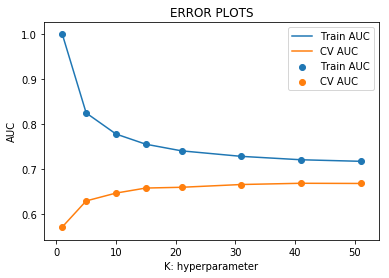

In [85]:
# plot showing performance of model both on train data and cross validation data for each hyper parameter
plot_k_vs_roc(train_auc, cv_auc)

## B) Train model with best hyper-parameter value

In [86]:
knn = KNeighborsClassifier(best_k_set1)
knn.fit(X_train_set1,y_train)

# print(X_test_set1)
y_train_pred = batch_predict( knn, X_train_set1)
y_test_pred = batch_predict( knn, X_test_set1)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)



test_auc_set1 = roc_auc_score(y_test, y_test_pred)

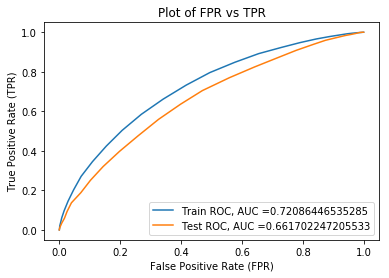

In [87]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix

### Train Set

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4358758918280356 for threshold 0.659
Confusion matrix, without normalization
Normalized confusion matrix


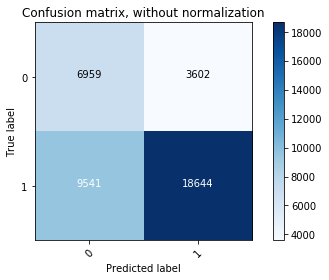

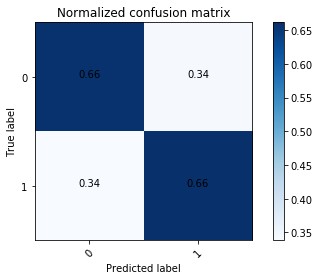

**********************************************************************


In [88]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")

compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)

### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3825717736205135 for threshold 0.659
Confusion matrix, without normalization
Normalized confusion matrix


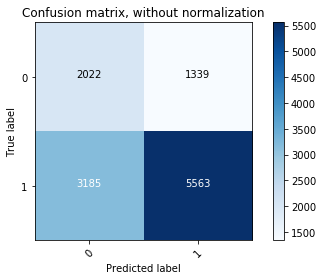

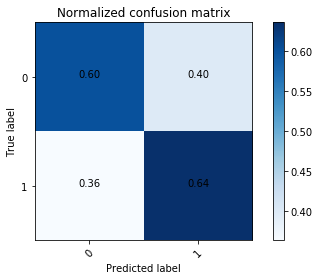

**********************************************************************


In [89]:
print("="*100)
print("Test confusion matrix")
# computa and plot confusion matrix for test data

compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

<h3>Observations</h3>

* We get k=41 as best value of k.
* Our model's AUC is quite better than that of a random model.

## Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_essay (TFIDF)
### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [90]:
# Please write all the code with proper documentation

X_train_set2 = hstack((categories_one_hot_train, sub_categories_one_hot_train,
           school_state_one_hot_train, teacher_prefix_one_hot_train,
           project_grade_category_one_hot_train, price_train, quantity_train,
           prev_teacher_proj_train, title_word_count_train, essay_word_count_train,
           essay_tfidf_train, title_tfidf_train)).tocsr()

X_cv_set2 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,
           school_state_one_hot_cv, teacher_prefix_one_hot_cv,
           project_grade_category_one_hot_cv, price_cv, quantity_cv,
           prev_teacher_proj_cv, title_word_count_cv, essay_word_count_cv,
           essay_tfidf_cv, title_tfidf_cv)).tocsr()

X_test_set2 = hstack((categories_one_hot_test, sub_categories_one_hot_test,
           school_state_one_hot_test, teacher_prefix_one_hot_test,
           project_grade_category_one_hot_test, price_test, quantity_test,
           prev_teacher_proj_test, title_word_count_test, essay_word_count_test,
           essay_tfidf_test, title_tfidf_test)).tocsr()

In [91]:
print("Final Data matrix for set2")
print(X_train_set2.shape, y_train.shape)
print(X_cv_set2.shape, y_cv.shape)
print(X_test_set2.shape, y_test.shape)
print("="*100)

Final Data matrix for set2
(38746, 12790) (38746,)
(9687, 12790) (9687,)
(12109, 12790) (12109,)


## A) Find the best hyper parameter which results in the maximum AUC value

In [92]:
best_k_set2, train_auc, cv_auc = find_best_k_using_auc(X_train_set2, y_train, X_cv_set2, y_cv)

100%|██████████| 8/8 [18:42<00:00, 140.86s/it]


The optimal number of neighbors is 51.


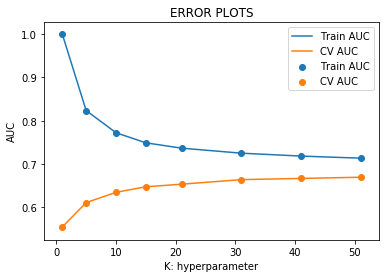

In [93]:
# plot showing performance of model both on train data and cross validation data for each hyper parameter
plot_k_vs_roc(train_auc, cv_auc)

## B) Train model with best hyper-parameter value

In [94]:
knn = KNeighborsClassifier(best_k_set2)
knn.fit(X_train_set2,y_train)

# print(X_test_set1)
y_train_pred = batch_predict( knn, X_train_set2)
y_test_pred = batch_predict( knn, X_test_set2)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)
test_auc_set2 = roc_auc_score(y_test, y_test_pred)

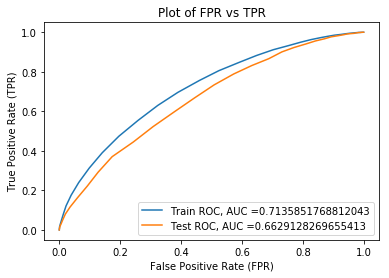

In [95]:

plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix
### Train Set

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.42603168559242494 for threshold 0.745
Confusion matrix, without normalization
Normalized confusion matrix


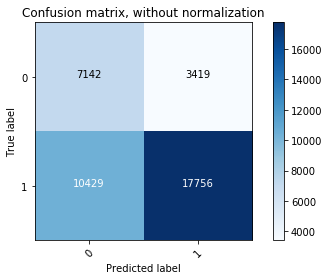

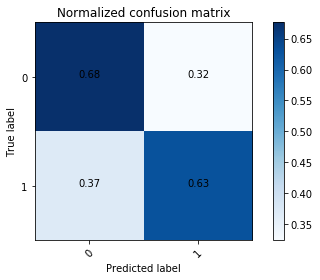

**********************************************************************


In [96]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")
compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)

### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3717648320041052 for threshold 0.745
Confusion matrix, without normalization
Normalized confusion matrix


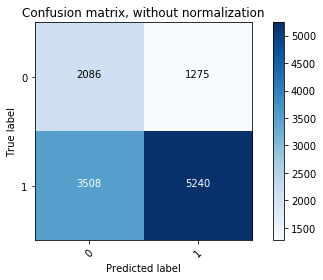

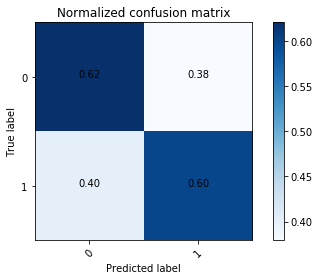

**********************************************************************


In [97]:
print("="*100)
print("Test confusion matrix")
compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

<h3>Observations</h3>

* We get k=51 as best value of k.
* Our model's AUC is very close to that of a random model.


## Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)
### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [98]:
# Please write all the code with proper documentation

X_train_set3 = hstack((categories_one_hot_train, sub_categories_one_hot_train,
           school_state_one_hot_train, teacher_prefix_one_hot_train,
           project_grade_category_one_hot_train, price_train, quantity_train,
           prev_teacher_proj_train, title_word_count_train, essay_word_count_train,
           essay_avg_w2v_train, title_avg_w2v_train)).tocsr()

X_cv_set3 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,
           school_state_one_hot_cv, teacher_prefix_one_hot_cv,
           project_grade_category_one_hot_cv, price_cv, quantity_cv,
           prev_teacher_proj_cv, title_word_count_cv, essay_word_count_cv,
           essay_avg_w2v_cv, title_avg_w2v_cv)).tocsr()

X_test_set3 = hstack((categories_one_hot_test, sub_categories_one_hot_test,
           school_state_one_hot_test, teacher_prefix_one_hot_test,
           project_grade_category_one_hot_test, price_test, quantity_test,
           prev_teacher_proj_test, title_word_count_test, essay_word_count_test,
           essay_avg_w2v_test, title_avg_w2v_test)).tocsr()

In [99]:
print("Final Data matrix for set3")
print(X_train_set3.shape, y_train.shape)
print(X_cv_set3.shape, y_cv.shape)
print(X_test_set3.shape, y_test.shape)
print("="*100)

Final Data matrix for set3
(38746, 704) (38746,)
(9687, 704) (9687,)
(12109, 704) (12109,)


## A) Find the best hyper parameter which results in the maximum AUC value


100%|██████████| 8/8 [3:47:18<00:00, 1686.96s/it]  


The optimal number of neighbors is 51.


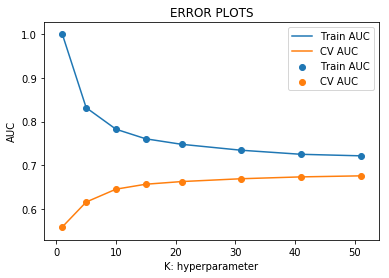

In [100]:

best_k_set3, train_auc, cv_auc = find_best_k_using_auc(X_train_set3, y_train, X_cv_set3, y_cv)

# plot showing performance of model both on train data and cross validation data for each hyper parameter
plot_k_vs_roc(train_auc, cv_auc)

## B) Train model with best hyper-parameter value

In [101]:
knn = KNeighborsClassifier(best_k_set3)
knn.fit(X_train_set3,y_train)

# print(X_test_set1)
y_train_pred = batch_predict( knn, X_train_set3)
y_test_pred = batch_predict( knn, X_test_set3)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)

test_auc_set3 = roc_auc_score(y_test, y_test_pred)


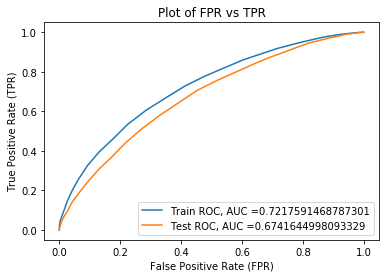

In [102]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix

### Train Set



Train confusion matrix
the maximum value of tpr*(1-fpr) 0.43441675591645057 for threshold 0.725
Confusion matrix, without normalization
Normalized confusion matrix


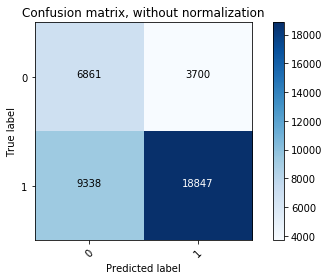

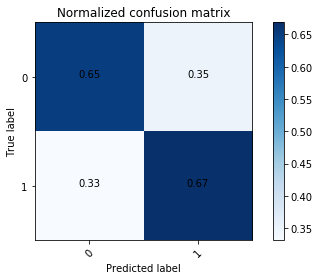

**********************************************************************


In [103]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")
compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)

### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3911758739907329 for threshold 0.725
Confusion matrix, without normalization
Normalized confusion matrix


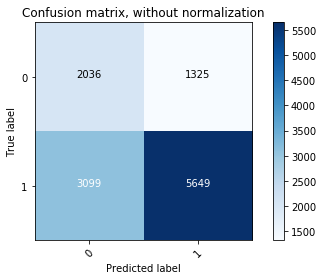

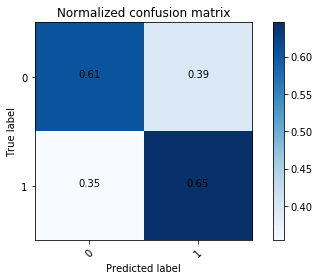

**********************************************************************


In [104]:
print("="*100)
print("Test confusion matrix")
compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

<h3>Observations</h3>

* We get k=51 as best value of k.

##  Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)
### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [105]:
# Please write all the code with proper documentation

essay_tfidf_w2v_train


X_train_set4 = hstack((categories_one_hot_train, sub_categories_one_hot_train,
           school_state_one_hot_train, teacher_prefix_one_hot_train,
           project_grade_category_one_hot_train, price_train, quantity_train,
           prev_teacher_proj_train, title_word_count_train, essay_word_count_train,
           essay_tfidf_w2v_train, title_tfidf_w2v_train)).tocsr()

X_cv_set4 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,
           school_state_one_hot_cv, teacher_prefix_one_hot_cv,
           project_grade_category_one_hot_cv, price_cv, quantity_cv,
           prev_teacher_proj_cv, title_word_count_cv, essay_word_count_cv,
           essay_tfidf_w2v_cv, title_tfidf_w2v_cv)).tocsr()

X_test_set4 = hstack((categories_one_hot_test, sub_categories_one_hot_test,
           school_state_one_hot_test, teacher_prefix_one_hot_test,
           project_grade_category_one_hot_test, price_test, quantity_test,
           prev_teacher_proj_test, title_word_count_test, essay_word_count_test,
           essay_tfidf_w2v_test, title_tfidf_w2v_test)).tocsr()

In [106]:
print("Final Data matrix for set4")
print(X_train_set4.shape, y_train.shape)
print(X_cv_set4.shape, y_cv.shape)
print(X_test_set4.shape, y_test.shape)
print("="*100)

Final Data matrix for set4
(38746, 704) (38746,)
(9687, 704) (9687,)
(12109, 704) (12109,)


## A) Find the best hyper parameter which results in the maximum AUC value

100%|██████████| 8/8 [4:20:29<00:00, 2001.25s/it]  



The optimal number of neighbors is 51.


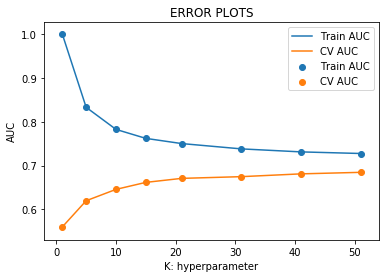

In [107]:

best_k_set4, train_auc, cv_auc = find_best_k_using_auc(X_train_set4, y_train, X_cv_set4, y_cv)

# plot showing performance of model both on train data and cross validation data for each hyper parameter
plot_k_vs_roc(train_auc, cv_auc)

## B) Train model with best hyper-parameter value

In [108]:
knn = KNeighborsClassifier(best_k_set4)
knn.fit(X_train_set4,y_train)

# print(X_test_set1)
y_train_pred = batch_predict( knn, X_train_set4)
y_test_pred = batch_predict( knn, X_test_set4)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)
test_auc_set4 = roc_auc_score(y_test, y_test_pred)


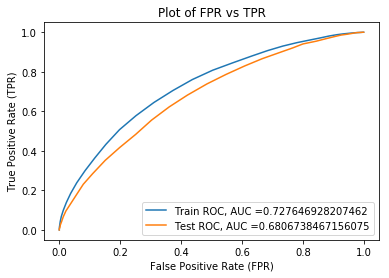

In [109]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix
### Train Set

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.44426683794831107 for threshold 0.725
Confusion matrix, without normalization
Normalized confusion matrix


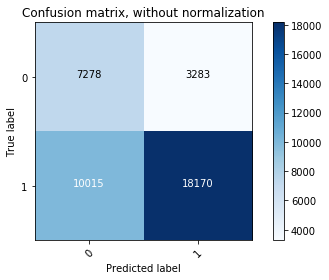

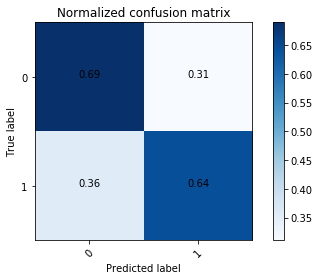

**********************************************************************


In [110]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")
compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)

### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.39760573658388465 for threshold 0.725
Confusion matrix, without normalization
Normalized confusion matrix


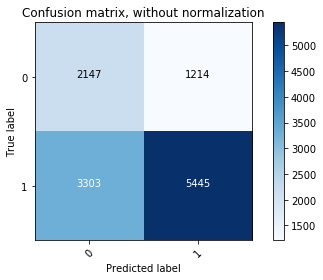

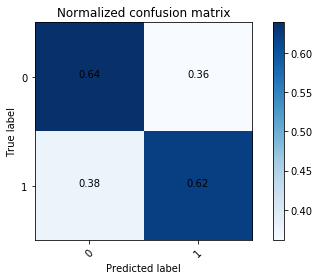

**********************************************************************


In [111]:
print("="*100)
print("Test confusion matrix")
compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

<h3>Observations</h3>

* We get k=51 as best value of k.
* Our model's AUC is very close to that of a random model.

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [112]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

X_train_set2 = hstack((categories_one_hot_train, sub_categories_one_hot_train,
           school_state_one_hot_train, teacher_prefix_one_hot_train,
           project_grade_category_one_hot_train, price_train, quantity_train,
           prev_teacher_proj_train, title_word_count_train, essay_word_count_train,
           essay_tfidf_train, title_tfidf_train)).tocsr()

X_cv_set2 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv,
           school_state_one_hot_cv, teacher_prefix_one_hot_cv,
           project_grade_category_one_hot_cv, price_cv, quantity_cv,
           prev_teacher_proj_cv, title_word_count_cv, essay_word_count_cv,
           essay_tfidf_cv, title_tfidf_cv)).tocsr()

X_test_set2 = hstack((categories_one_hot_test, sub_categories_one_hot_test,
           school_state_one_hot_test, teacher_prefix_one_hot_test,
           project_grade_category_one_hot_test, price_test, quantity_test,
           prev_teacher_proj_test, title_word_count_test, essay_word_count_test,
           essay_tfidf_test, title_tfidf_test)).tocsr()



best_feat_vect = SelectKBest(chi2, k=2000).fit(X_train_set2, y_train)

X_train_top2000 =  best_feat_vect.transform(X_train_set2)

X_cv_top2000 = best_feat_vect.transform(X_cv_set2)

X_test_top2000 = best_feat_vect.transform(X_test_set2)

In [113]:
print("Final Data matrix for set5")
print(X_train_top2000.shape, y_train.shape)
print(X_cv_top2000.shape, y_cv.shape)
print(X_test_top2000.shape, y_test.shape)
print("="*100)

Final Data matrix for set5
(38746, 2000) (38746,)
(9687, 2000) (9687,)
(12109, 2000) (12109,)


## A) Find the best hyper parameter which results in the maximum AUC value

100%|██████████| 8/8 [13:55<00:00, 104.13s/it]


The optimal number of neighbors is 51.


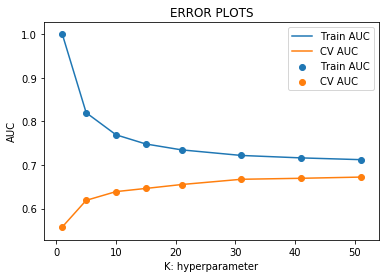

In [114]:

best_k_set_top2000, train_auc, cv_auc = find_best_k_using_auc(X_train_top2000, y_train, X_cv_top2000, y_cv)

# plot showing performance of model both on train data and cross validation data for each hyper parameter
plot_k_vs_roc(train_auc, cv_auc)

## B) Train model with best hyper-parameter value

In [115]:
knn = KNeighborsClassifier(best_k_set_top2000)
knn.fit(X_train_top2000,y_train)

# print(X_test_set1)
y_train_pred = batch_predict( knn, X_train_top2000)
y_test_pred = batch_predict( knn, X_test_top2000)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)
test_auc_top2000 = roc_auc_score(y_test, y_test_pred)


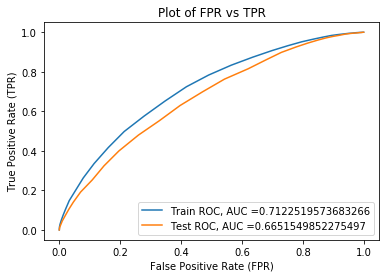

In [116]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix

### Train Set

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4254354854453352 for threshold 0.725
Confusion matrix, without normalization
Normalized confusion matrix


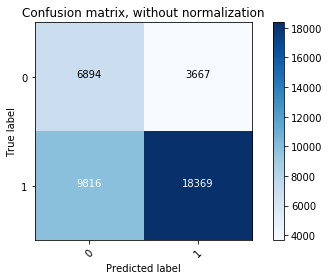

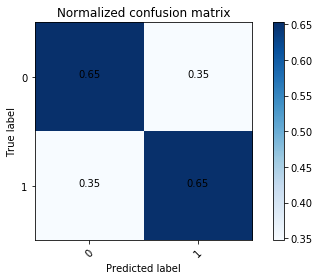

**********************************************************************


In [117]:
# computa and plot confusion matrix for train data

print("="*100)
print("Train confusion matrix")
compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)

### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3795881699044705 for threshold 0.745
Confusion matrix, without normalization
Normalized confusion matrix


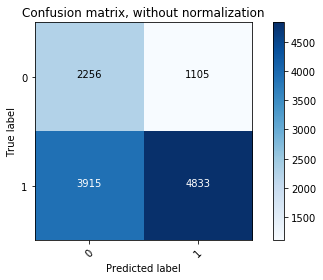

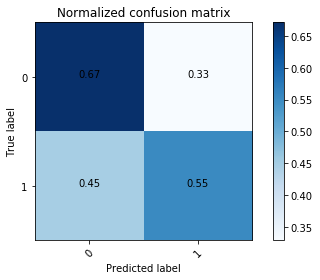

**********************************************************************


In [118]:
print("="*100)
print("Test confusion matrix")
compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

<h3>Observations</h3>

* We get k=51 as best k value
* After selecting Top 2000 features from TFIDF, our test AUC is almost same to that of TFIDF without feature selection.

<h1>3. Conclusions</h1>

In [120]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

x.add_row(["BOW", 'Brute', best_k_set1, test_auc_set1])
x.add_row(["TFIDF", 'Brute', best_k_set2, test_auc_set2])
x.add_row(["W2V", 'Brute', best_k_set3, test_auc_set3])
x.add_row(["TFIDFW2V", 'Brute', best_k_set4, test_auc_set4])
x.add_row(["TFIDF(2000 features)", 'Brute', best_k_set_top2000, test_auc_top2000])

print(x)

+----------------------+-------+-----------------+--------------------+
|      Vectorizer      | Model | Hyper Parameter |        AUC         |
+----------------------+-------+-----------------+--------------------+
|         BOW          | Brute |        41       | 0.661702247205533  |
|        TFIDF         | Brute |        51       | 0.6629128269655413 |
|         W2V          | Brute |        51       | 0.6741644998093329 |
|       TFIDFW2V       | Brute |        51       | 0.6806738467156075 |
| TFIDF(2000 features) | Brute |        51       | 0.6651549852275497 |
+----------------------+-------+-----------------+--------------------+


<h3>Observations</h3>

* Based on above table, we can see that TFIDF Word To Vector has slight higher test AUC than others (This may be because we have taken only 64K points due to RAM limit)
* After selecting Top 2000 features from TFIDF, our test AUC is almost same to that of TFIDF without feature selection..
* Test AUC of almost all the models is very close to that of random model.